## Quantum Error Mitigation

Dealing with errors is crucial for achieving reliable results. This also enhances quantum circuit performance.

Quantum computers are highly susceptible to errors due to decoherence, gate imperfections, and other noise sources. 

Unlike classical computers, where error correction is straightforward, quantum error correction is more complex due to the delicate nature of quantum states.

 However, various techniques for error mitigation can help improve the performance of quantum circuits without requiring full-scale quantum error correction.

One effective error mitigation technique is Zero-Noise Extrapolation (ZNE). 

ZNE works by running the same quantum circuit at different noise levels and then extrapolating the results back to the zero-noise limit. 

Let's dive into an example using Qiskit. Below is a simple implementation of ZNE using IBM's Qiskit:

This example demonstrates how ZNE can be implemented using Qiskit to improve the accuracy of quantum circuit results by mitigating the effects of noise. The process can be broken down as under:

✅ Quantum Circuit Definition: We define a simple quantum circuit with a Hadamard gate and a measurement.

✅ Noise Model Creation: We create a noise model with a depolarizing error.

✅ Zero-Noise Extrapolation Function: We define a function to perform ZNE by scaling the noise and extrapolating to zero noise.

✅ Noise Scaling Factors: We define noise scaling factors for the extrapolation.

✅ Extrapolation Execution: We run the quantum circuit with scaled noise and extrapolate the results to zero noise.

✅ Results Visualization: We plot the zero-noise extrapolated counts.

In [16]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
# Define a simple quantum circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

In [18]:
# Create a noise model
noise_model = noise.NoiseModel()
# Depolarizing error with 5% probability
error = noise.depolarizing_error(0.05, 1)  
noise_model.add_all_qubit_quantum_error(error, ['h'])

In [19]:
# Use Aer's simulator with the noise model
simulator = AerSimulator(noise_model=noise_model)

In [20]:
# Define a function to perform zero-noise extrapolation
def zero_noise_extrapolation(qc, noise_scaling_factors):
    counts_list = []
    for scale in noise_scaling_factors:
        # Scale the noise by repeating the gates
        scaled_qc = qc.copy()
        for _ in range(scale - 1):
            scaled_qc = scaled_qc.compose(qc)
        
        # Transpile the circuit for the noise model
        transpiled_qc = transpile(scaled_qc, simulator)
        
        # Execute the circuit and get counts
        result = simulator.run(transpiled_qc).result()
        counts = result.get_counts()
        counts_list.append(counts)
    
    # Extrapolate to zero noise
    zero_noise_counts = {}
    for key in counts_list[0].keys():
        y_vals = np.array([counts.get(key, 0) for counts in counts_list])
        fit = np.polyfit(noise_scaling_factors, y_vals, deg=2)
        zero_noise_counts[key] = np.polyval(fit, 0)
    
    return zero_noise_counts

In [21]:
# Define noise scaling factors
noise_scaling_factors = [1, 2, 3]

In [22]:
# Perform zero-noise extrapolation
zne_counts = zero_noise_extrapolation(qc, noise_scaling_factors)

<Figure size 1000x600 with 0 Axes>

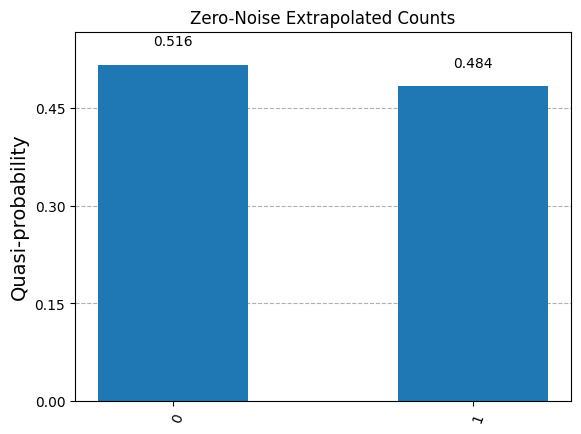

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
plot_histogram(zne_counts, title="Zero-Noise Extrapolated Counts")
plt.show()

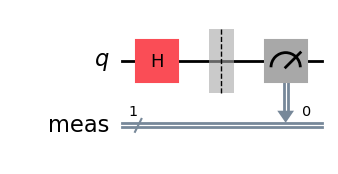

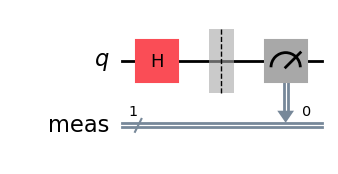

In [24]:
#Visualize circuit
qc.draw('mpl')